# Experiment - 7 (Logistic Regression)
Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of Logistic Regression for Classification

Aim: To implement and understand the Logistic Regression algorithm for classification tasks and evaluate its performance on a given dataset.

---


Problem statement:

- Use the given dataset(s) to demonstrate the application of the Logistic Regression algorithm for classification. The task is to classify the data points into different classes based on the features and to understand how logistic regression models the probability of class membership using a sigmoid function.

---

In [ ]:
R_STATE  = 1

In [3]:
from google.colab import userdata
root = userdata.get('sml_ds')

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv(f'{root}/lr_ds.csv')
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


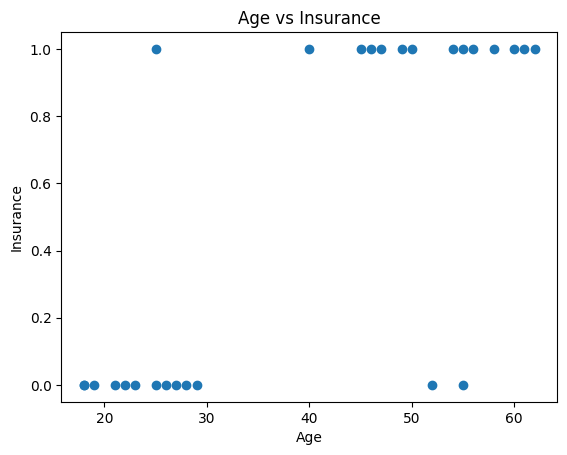

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.age,
            data.bought_insurance)
plt.title("Age vs Insurance")
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.show()

#### Preprocessing Block

In [ ]:
X = data[['age']]
y = data[['bought_insurance']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=R_STATE)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy Score of predictions: ", accuracy_score(y_test, y_pred))

Accuracy Score of predictions:  0.8571428571428571


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lr.coef_, lr.intercept_)

[[1.45444055]] [0.31142236]


In [ ]:
import math

def sigmoid(x):
    return(1 / (1 + math.exp(-x)))

def lr_pred(age):
    print(sigmoid(lr.coef_ * age + lr.intercept_))

lr_pred(20)

0.9999999999998295


/tmp/ipython-input-2629241239.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return(1 / (1 + math.exp(-x)))


### Diabetes dataset

In [5]:
data = pd.read_csv(f"{root}/lr_ds1.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


<Axes: >

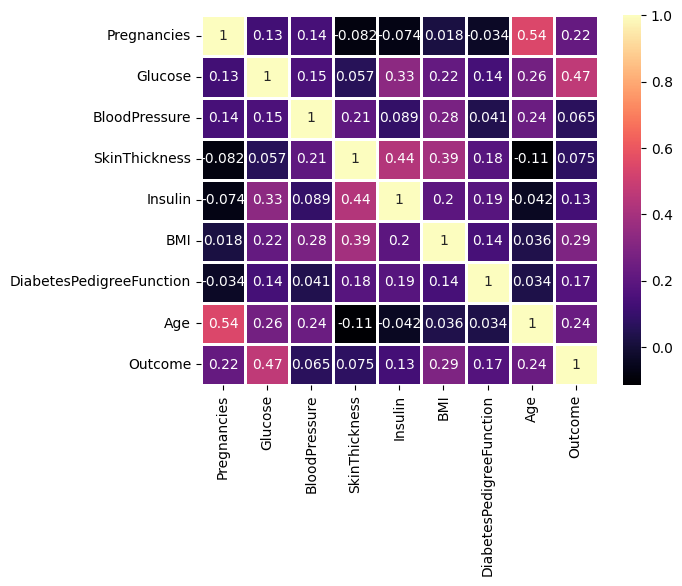

In [ ]:
sns.heatmap(data.corr(), annot=True, linewidth=2, cmap='magma')

#### Preprocessing

In [ ]:
cols = ['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[cols]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=R_STATE)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("Accuracy Score of predictions: ", accuracy_score(y_test, y_pred))

Accuracy Score of predictions:  0.765625


### MLP on diabetes

In [ ]:
#trying multi layer perceptron
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=R_STATE)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='logistic', random_state=R_STATE, max_iter = 1000, solver = 'adam')
mlp.fit(X_tr, y_tr)
y_pr = mlp.predict(X_te)
print("Accuracy Score of predictions: ", accuracy_score(y_te, y_pr))

Accuracy Score of predictions:  0.734375
